## Мини-проект "Видеоигры"

#### Цель проекта: 
исследовать набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

#### Входные данные:
- Rank – место по объему продаж
- Name – название игры
- Platform – платформа, на которой выпущена игра
- Year – год релиза
- Genre – жанр
- Publisher – издатель
- NA_Sales – продажи в Северной Америке, в млн.
- EU_Sales – продажи в Европе, в млн.
- JP_Sales – продажи в Японии, в млн.
- Other_Sales – продажи в остальном мире, в млн.
- Global_Sales – продажи по всему миру, в млн.

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
from scipy.stats import mode
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid" )

In [2]:
games = pd.read_csv('games.csv')

#### Определим, в каком столбце встретилось больше всего пропущенных значений

In [3]:
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Ответ: 
в столбце Year встретилось больше всего пропущенных значений- 271 строк

In [6]:
# уберем эти пропущенные значения
games.dropna(inplace=True)

#### Выведем описательные характеристики переменной Year и построим график распределения количества выпущенных игр по годам.

In [7]:
games.Year = games.Year.astype('int')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

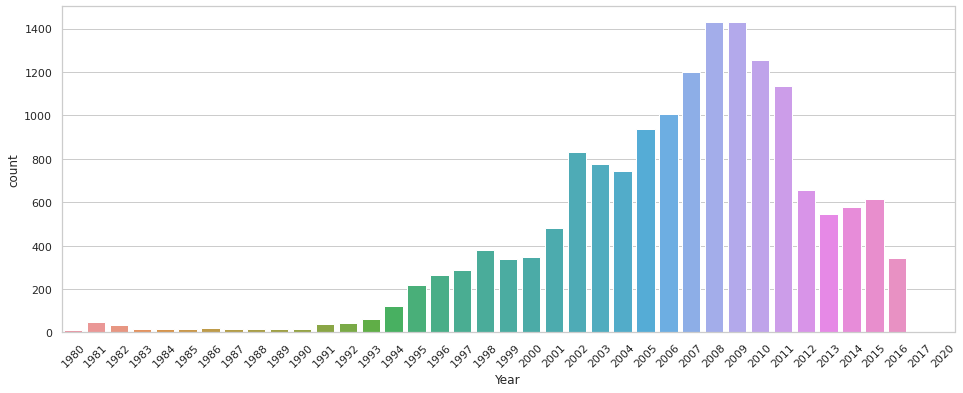

In [8]:
sns.countplot(x=games.Year)
plt.xticks(rotation=45)

#### Узнаем моду распределения выпущенных игр

In [9]:
mode(games.Year)

ModeResult(mode=array([2009]), count=array([1431]))

#### Посмотрим на каких платформах произошло больше всего релизов, частота встречаемости которых составляет более 7%

In [10]:
games.Platform.value_counts(normalize=True).mul(100).to_frame('pct').head(5)

,pct
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735


#### Проверим, игры каких издателей встречаются в датасете чаще всего?

In [11]:
mode(games.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

#### Сфокусируемся на играх от Nintendo. Посчитаем среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other)

In [12]:
games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


#### Посмотрим на продажи Nintendo в Японии по жанрам и построим боксплот

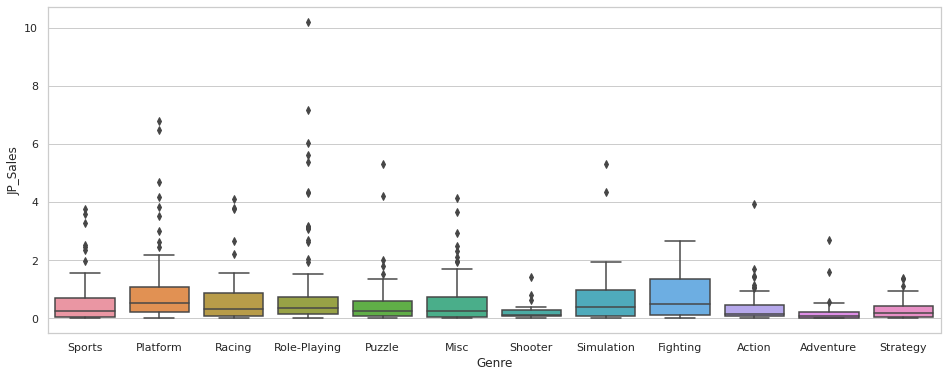

In [13]:
sns.boxplot(data=games.query("Publisher == 'Nintendo'"), x='Genre', y='JP_Sales')

#### Визуализируем динамику изменения объема мировых продаж по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports

In [23]:
df = (games.query("Publisher == 'Nintendo'")
    .query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")
    .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index())
df.head(5)

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55


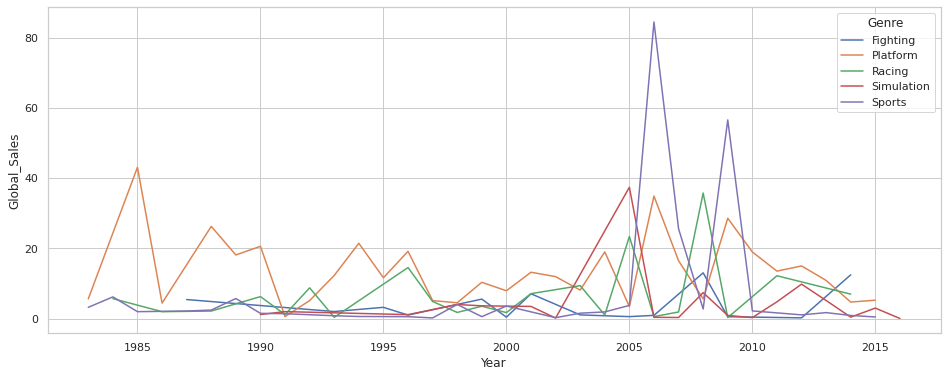

In [24]:
sns.lineplot(data=df, x='Year', y='Global_Sales', hue='Genre')